In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/mushrooms_clean2.csv")

In [3]:
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,False,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,wood
freq,4208,3659,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Class
data['class'].replace('edible', 0, inplace = True)
data['class'].replace('poisonous', 1, inplace = True)

#Bruises
data['bruises'].replace(False, 0, inplace = True)
data['bruises'].replace(True, 1, inplace = True)

# Gill_attachement 
data['gill_attachment'].replace('free', 0, inplace = True)
data['gill_attachment'].replace('attached', 1, inplace = True)

# Gill_spacing
data['gill_spacing'].replace('close', 0, inplace = True)
data['gill_spacing'].replace('crowded', 1, inplace = True)

# Gill size
data['gill_size'].replace('narrow', 0, inplace = True)
data['gill_size'].replace('broad', 1, inplace = True)


In [6]:
aux = data.select_dtypes(include = ["object", "category"]).columns
aux

Index(['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [7]:
aux2 = data[['class', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size']]
aux2 = aux2.astype({"bruises":'int'}) 

In [8]:
data_dummies = pd.get_dummies(data[aux])

In [9]:
datos = pd.concat([data_dummies, aux2], axis = 1)

In [10]:
datos.dtypes

cap_shape_Convex     uint8
cap_shape_bell       uint8
cap_shape_convex     uint8
cap_shape_flat       uint8
cap_shape_knobbed    uint8
                     ...  
class                int64
bruises              int32
gill_attachment      int64
gill_spacing         int64
gill_size            int64
Length: 114, dtype: object

In [11]:
datos.head()
datos.to_csv("data/mushrooms_dummy.csv")

In [12]:
x = datos.drop(['class'], axis = 1)
y = datos["class"]

In [13]:
from sklearn.model_selection import train_test_split

np.random.seed(210705)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((6093, 113), (6093,))

X_test, y_test:  ((2031, 113), (2031,))


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import ParameterGrid, GridSearchCV

dt = DecisionTreeClassifier(random_state = 5432)

grid = {'max_depth':[5,7,11],'min_samples_leaf': [7,9,11,13] ,'criterion': ['entropy']}

gs = GridSearchCV(dt, param_grid=grid, scoring='recall', cv=5, n_jobs=-1,
                  return_train_score = True)

In [15]:
gs.fit(X_train, y_train)
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       random_state=5432)

In [16]:
dt=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, #presort='deprecated',
                       random_state=5432, splitter='best')

In [17]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=5432)

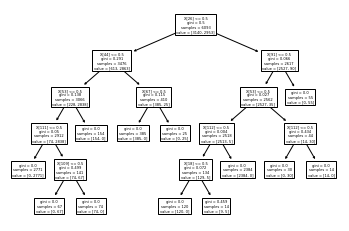

In [18]:
from sklearn import tree

plt.clf() # nos permite borrar cualquier figura existente hasta este momento para tener un canvas en blanco
plot_tree(dt)
plt.savefig('arbol_mushrooms.pdf')
plt.show()


In [19]:
from sklearn.tree import export_text

decisions = export_text(dt, feature_names=x.columns.to_list())
print(decisions)

|--- odor_none <= 0.50
|   |--- stalk_root_club <= 0.50
|   |   |--- stalk_surface_below_ring_scaly <= 0.50
|   |   |   |--- gill_spacing <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- gill_spacing >  0.50
|   |   |   |   |--- bruises <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bruises >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- stalk_surface_below_ring_scaly >  0.50
|   |   |   |--- class: 0
|   |--- stalk_root_club >  0.50
|   |   |--- stalk_color_below_ring_cinnamon <= 0.50
|   |   |   |--- class: 0
|   |   |--- stalk_color_below_ring_cinnamon >  0.50
|   |   |   |--- class: 1
|--- odor_none >  0.50
|   |--- spore_print_color_green <= 0.50
|   |   |--- stalk_surface_below_ring_scaly <= 0.50
|   |   |   |--- gill_size <= 0.50
|   |   |   |   |--- cap_color_white <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cap_color_white >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- gill_size >  0.50
|   |   |   |   |--- class: 0
|

In [20]:
feature_importances_df = pd.DataFrame({'feature': x.columns.values, 
                                       'importance': dt.feature_importances_})

In [22]:
orden=feature_importances_df.sort_values(by="importance", ascending=False)
orden

,feature,importance
26,odor_none,0.612415
44,stalk_root_club,0.178043
53,stalk_surface_below_ring_scaly,0.104644
91,spore_print_color_green,0.034494
111,gill_spacing,0.024336
...,...,...
35,gill_color_orange,0.000000
34,gill_color_green,0.000000
33,gill_color_gray,0.000000
32,gill_color_chocolate,0.000000


In [24]:
porcentajes=orden.copy()
porcentajes['importance'] = porcentajes['importance'].div(porcentajes['importance'].sum(), axis=0).multiply(100)
lista=porcentajes['importance'].to_numpy()
string_ints = [str(round(i,2))+"%" for i in lista]
nombres=porcentajes["feature"].to_numpy()
porcentajes['importance']=string_ints
table = pd.DataFrame(porcentajes[:10].to_numpy(),columns={"feature","importance"})
table

,feature,importance
0,odor_none,61.24%
1,stalk_root_club,17.8%
2,stalk_surface_below_ring_scaly,10.46%
3,spore_print_color_green,3.45%
4,gill_spacing,2.43%
5,bruises,2.32%
6,stalk_color_below_ring_cinnamon,1.55%
7,gill_size,0.64%
8,cap_color_white,0.11%
9,veil_type_partial,0.0%


In [25]:
table.to_csv('importancias.csv')

In [22]:
#columnas = orden[orden.importance >= 0.00001]
#columnas = columnas['feature'].to_numpy()

In [27]:
#X_train=X_train.filter(columnas)
#X_test=X_test.filter(columnas)
print("\nX_train, X_test: ", (X_train.shape, X_test.shape))


X_train, X_test:  ((6093, 113), (2031, 113))


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 7654)
grid={'n_estimators':[500, 800, 1000],'max_depth':[11,13,15],'min_samples_leaf':[11,13],'criterion':["gini","entropy"]}
gs_rf = GridSearchCV(rf, grid, cv = 5, scoring = 'recall', return_train_score = True, n_jobs = -1)

In [29]:
import time
start = time.time()
gs_rf.fit(X_train, y_train)

print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 333.8398675918579


In [30]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=11, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=7654)

In [32]:
start = time.time()
rf_2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, 
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=7654, verbose=0,
                       warm_start=False)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 0.0


In [33]:
start = time.time()


rf_2.fit(X_train, y_train)

print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 1.7391555309295654


In [34]:
feature_importances_df = pd.DataFrame({'importance': X_train.columns.values, 'feature': rf_2.feature_importances_})

In [30]:
feature_importances_df.sort_values(by='importance',ascending=False)

,feature,importance
0,odor_none,0.444777
5,bruises,0.147098
7,gill_size,0.116699
1,stalk_root_club,0.093309
4,gill_spacing,0.076249
2,stalk_surface_below_ring_scaly,0.062700
3,spore_print_color_green,0.039405
8,cap_color_white,0.016675
6,stalk_color_below_ring_cinnamon,0.003088


In [35]:
predicted_labels = rf_2.predict(X_test)
predicted_scores = rf_2.predict_proba(X_test)

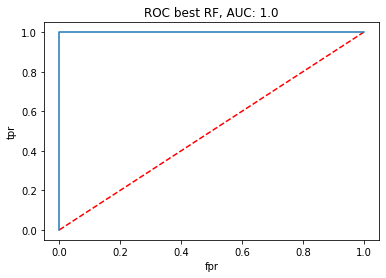

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)
plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_scores[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [37]:
roc_auc_score(y_test, predicted_scores[:,1])

1.0

In [40]:
precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)


<Figure size 432x288 with 0 Axes>

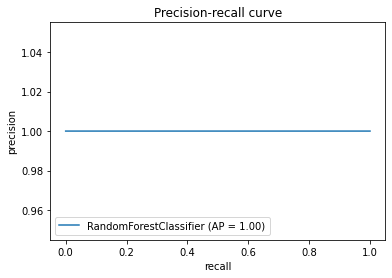

In [39]:
from sklearn.metrics import plot_precision_recall_curve

plt.clf()
plot_precision_recall_curve(rf_2, X_test, y_test)
plt.title("Precision-recall curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [41]:
thresholds_2 = np.append(thresholds_2, 1)
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df



metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.335330,1.0,1.000000,1.000000,1.000000,0.0,1.0,0.000000
1,0.992732,1.0,0.761163,0.864387,0.761163,0.0,1.0,0.238837
2,0.992758,1.0,0.759086,0.863046,0.759086,0.0,1.0,0.240914
3,0.992905,1.0,0.758048,0.862374,0.758048,0.0,1.0,0.241952
4,0.992933,1.0,0.755971,0.861029,0.755971,0.0,1.0,0.244029
...,...,...,...,...,...,...,...,...
189,0.999967,1.0,0.063344,0.119141,0.063344,0.0,1.0,0.936656
190,0.999975,1.0,0.060228,0.113614,0.060228,0.0,1.0,0.939772
191,0.999985,1.0,0.059190,0.111765,0.059190,0.0,1.0,0.940810
192,1.000000,1.0,0.031153,0.060423,0.031153,0.0,1.0,0.968847


In [45]:
negocio = metrics_report[metrics_report.threshold <= 0.5]
negocio

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.33533,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [46]:
renglon=negocio.threshold.idxmax()
punto_corte = negocio.threshold[renglon]
punto_corte

0.3353297065151287

In [47]:
negocio.precision.values[renglon],negocio.recall.values[renglon]

(1.0, 1.0)

In [48]:
new_labels = [0 if score < punto_corte else 1 for score in predicted_scores[:,1]]

In [49]:
confusion_matrix(y_test, new_labels)

array([[1068,    0],
       [   0,  963]], dtype=int64)

In [50]:
rf_2.oob_score_

0.9981946495978993